# OpenCVpythonMeasurePlanarObjects

Pinhole cameras are widely used for computer vision tasks because price accessibility and the features that can be extracted form an image are rich enough about the environment information. The relationship between world points and the camera points is given by the following matrix equation.

$\alpha \begin{bmatrix}x_c \\y_c \\1\end{bmatrix}= MR
\begin{bmatrix}
x_w \\
y_w \\
z_w \\
\end{bmatrix}
+t
\\\\
M = \begin{bmatrix}
f_x & 0 & c_x \\
0 & f_y & c_y \\
0 & 0 & 1
\end{bmatrix}; \quad
R = \begin{bmatrix}
r_{x,1} & r_{x,2} & r_{x,3} \\
r_{y,1} & r_{y,2} & r_{y,3} \\
r_{z,1} & r_{z,2} & r_{z,3}
\end{bmatrix}; \quad
t = \begin{bmatrix}
t_x \\
t_y \\
t_z
\end{bmatrix}$

Here $x_c$ and $y_c$ are the coordinates of a point in the camera plane, corresponding to a point located in the real world plane given by $x_w$, $y_w$ and $z_w$ coordinates. The matrix $M$ is known as the camera matrix, which corresponds to the intrinsic parameters, which are the focal lengths $f_x$ and $f_y$, and the optical centers $c_x$ and $c_y$. The matrix $R$ and vector $t$ are the extrinsic parameters which gives the information about the relative position of the camera, that is, the rotation form the origin of the real world plane and also the traslation from the origin of that plane. Finally $\alpha$ is the scale factor that accounts for the distance from the camera to the real world coordinate.

However, pinhole cameras have some issues related to the distortion of the image because of the lens used. First a camera can present a distortion due to the lens inside it, this distortion becomes evident near the edges of the camera. The distrotion created by this effect, follows the equation below

\begin{equation}
\begin{array}{c}
x_{distorted} = x_c\left(1 + k_1 r^2 + k_2 r^4 + k_3 r^6 \right) 
\\
y_{distorted} = y_c\left(1 + k_1 r^2 + k_2 r^4 + k_3 r^6 \right) 
\end{array}
\end{equation}
where the $r^2 = x^2 + y^2$ and $k_1,\hspace{2mm}k_2$ and $k_3$ are de distortion coefficients.

The same applies to the tangential distortion, which is a consequence of the deviation of the camera lens, i.e., the lens is not parallel to the plane of the sensor. The behavior is modelled by the following equation
\begin{equation}
\begin{array}{c}
x_{distorted} = x + \left( 2p_1 xy + p_2\left( r^2 + 2x^2 \right) \right) 
\\
y_{distorted} = y + \left( 2p_2 xy + p_1\left( r^2 + 2y^2 \right) \right) 
\end{array}
\end{equation}
where $p_1$ and $p_2$ are the tangential distortion coefficients

The principal objective is to find the pattern in the image detected by the camera and then translate the camera coordinates to the real world coordinates.

OpenCV is a programming language focus on Computer Vision tasks. It offer different functionalites for image and video processing together with the versatility for its implementation on different language programmings such as Python and C++. The latter feature is important for developing image processing tasks in embedding systems such as the raspberry pi. On the other hand, MATLAB have a well developed software for the implementation of computer vision tasks, but the problem is the lack of compatibility with embedding systems and autonomous systems and also the processing time needed for its implementation.

OpenCV does not have an application or function that can measure planar objects from a detected plane as MATLAB, so the programs developed in MATLAB will be trnslated to OpenCV in python to accomplish the same task. 

First wee need to compute the intrinsic parameters of the camera. for this, we need  a series of images with a calibration pattern, i.e. a chessboard table. The chessboard table need to be in a distance similarly in which the camera will be used and in different positions and orientations. Here we use 30 images of the chessboard with different orientations. However, the number of images can vary from camera to camera. An important remark is  that the autofocus need to be deactivated to preserve the coefficients obtained for the intrinsic matrix. Some of the examples use for the image calibration are shown 

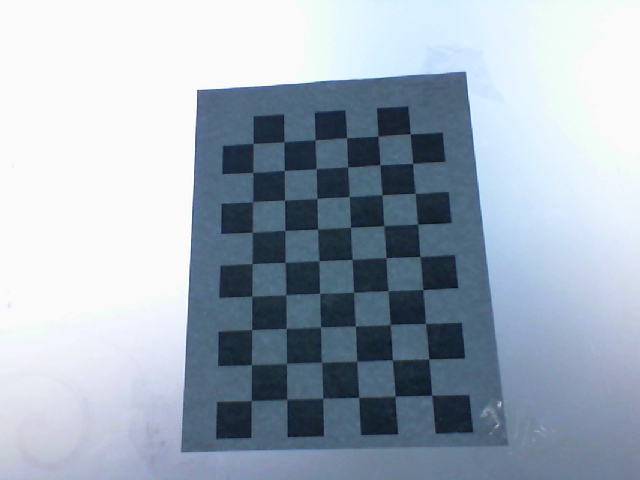

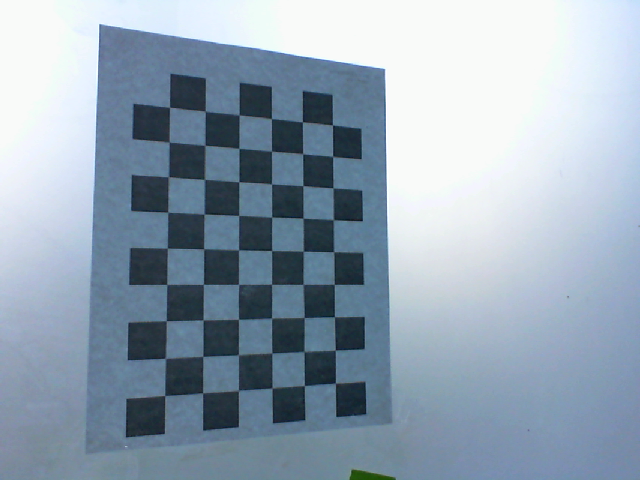

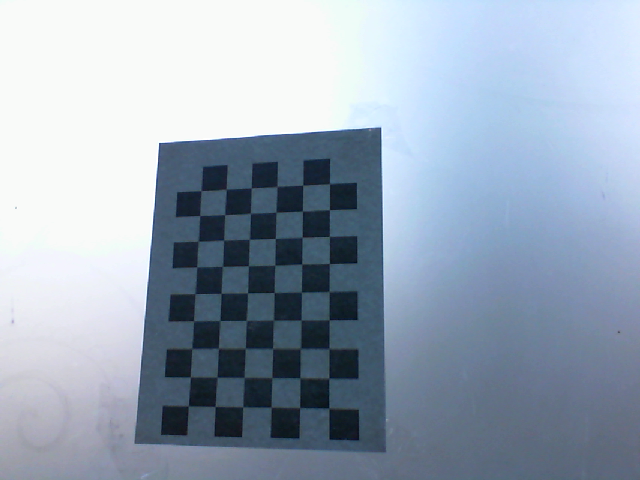


The program, modified from \textit{https://stackoverflow.com/questions/34588464/python-how-to-capture-image-from-webcam-on-click-using-opencv}, open the camera and sets the parameters of the camera. However, there are some functions that OpenCV does not have such as the autofocus adjustment, which needs to be set manually from the prompt window.

If a "SPACE" key is press, an image is taken and saved into the current workspace. It is easy to find that the directory can be changed to another one, but in this case for simplicity, we set it in this way. Finally, in order to exit the program, we need to press the "ESC" key.

After the images are taken, we use the calibration function form OpenCV that computes the camera matrix and the distrotion coefficients by means fo the Levenberg-Marqudt algorithm. Once the camera matrix is computed, is saved along with the distortion coefficients which are invariant from the camera position and orientation.